In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (11, 8.5)

<br><br>
# Lawful residence

In [2]:
lawful_residence = pd.read_html('https://www.dhs.gov/immigration-statistics/yearbook/2016/table1')[0][1:]
refugee = pd.read_html('https://www.dhs.gov/immigration-statistics/yearbook/2016/table13')[0][1:].dropna()
alien_apprehension = pd.read_html('https://www.dhs.gov/immigration-statistics/yearbook/2016/table33')[0][1:]
alien_removal = pd.read_html('https://www.dhs.gov/immigration-statistics/yearbook/2016/table39')[0][1:]

In [3]:
lawful_residence = pd.read_html('https://www.dhs.gov/immigration-statistics/yearbook/2016/table1')
lawful_residence = lawful_residence[0][1:].reset_index(drop = True)
lawful_residence.columns = ['Year', 'Number']
lawful_residence['Year'] = lawful_residence['Year'].astype(int)
lawful_residence['Number'] = lawful_residence['Number'].astype(int)
for i in range(len(lawful_residence)):
    if lawful_residence['Year'][i] >= 2020:
        print('This index is bad: %f' % i)

This index is bad: 40.000000


In [4]:
lawful_residence['Year'][40]

19761

In [5]:
lawful_residence['Year'][40] = 1976

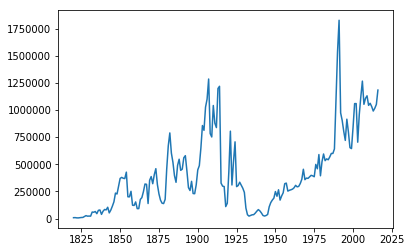

In [6]:
plt.plot(lawful_residence['Year'], lawful_residence['Number'])

<br><br><br>
# Refugee

In [7]:
refugee = pd.read_html('https://www.dhs.gov/immigration-statistics/yearbook/2016/table13')
refugee = refugee[0][1:]
refugee = refugee.dropna().reset_index(drop = True)
refugee.columns = ['Year', 'Number']
refugee['Year'] = refugee['Year'].astype(int)
refugee['Number'] = refugee['Number'].astype(int)
for i in range(len(refugee)):
    if refugee['Year'][i] >= 2020:
        print('This index is bad: %f' % i)

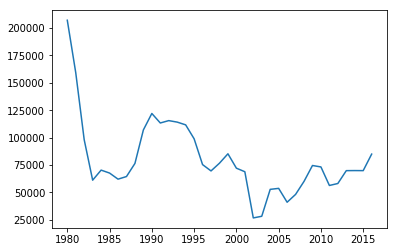

In [8]:
plt.plot(refugee['Year'], refugee['Number'])

<br><br>
# Alien Apprehension

In [9]:
alien_apprehension = pd.read_html('https://www.dhs.gov/immigration-statistics/yearbook/2016/table33')
alien_apprehension = alien_apprehension[0][1:].reset_index(drop = True)
alien_apprehension.columns = ['Year', 'Number']
alien_apprehension['Year'] = alien_apprehension['Year'].astype(str)
new_Year = []
for i in alien_apprehension['Year']:
    new_Year.append(i[0:4])
alien_apprehension['Year'] = new_Year
alien_apprehension['Year'] = alien_apprehension['Year'].astype(int)
alien_apprehension['Number'] = alien_apprehension['Number'].astype(int)

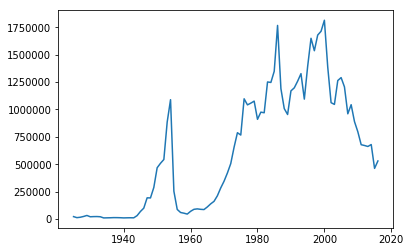

In [10]:
plt.plot(alien_apprehension['Year'], alien_apprehension['Number'])

<br><br>
# Alien Removed

In [11]:
alien_removal = pd.read_html('https://www.dhs.gov/immigration-statistics/yearbook/2016/table39')
alien_removal = alien_removal[0][1:].reset_index(drop = True)
alien_removal.columns = ['Year', 'Removed', 'Returned']
alien_removal['Year'] = alien_removal['Year'].astype(str)
new_Year = []
for i in alien_removal['Year']:
    new_Year.append(i[0:4])
alien_removal['Year'] = new_Year
alien_removal['Year'] = alien_removal['Year'].astype(int)
alien_removal['Removed'] = alien_removal['Removed'].astype(int)

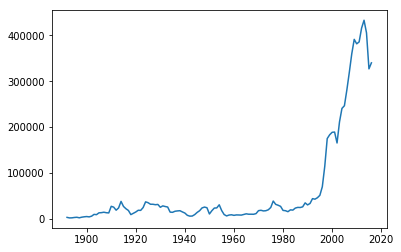

In [12]:
plt.plot(alien_removal['Year'], alien_removal['Removed'])

<br><br>
# All together

In [13]:
earliest_year_for_all = refugee['Year'].min()

lawful_residence = lawful_residence[lawful_residence['Year'] >= earliest_year_for_all]
alien_apprehension = alien_apprehension[alien_apprehension['Year'] >= earliest_year_for_all]
alien_removal = alien_removal[alien_removal['Year'] >= earliest_year_for_all]

In [ ]:
pylab.rcParams['figure.figsize'] = (11, 11)

/home/jeremydiaz/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


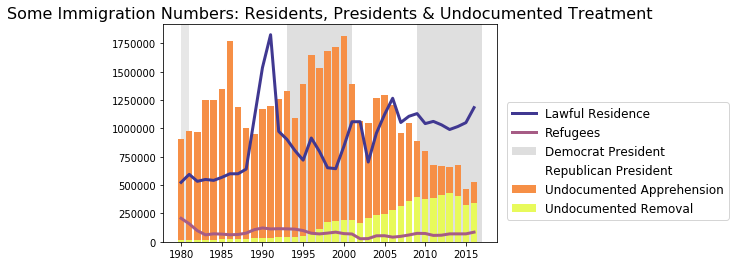

In [15]:
plt.axvspan(1980, 1981, facecolor = 'grey', alpha = 0.25, label = 'Democrat President')

plt.axvspan(1981, 1989, facecolor = 'white', alpha = 0.25, label = 'Republican President')

plt.axvspan(1980, 1993, facecolor = 'white', alpha = 0.25)

plt.axvspan(1993, 2001, facecolor = 'grey', alpha = 0.25)

plt.axvspan(2001, 2009, facecolor = 'white', alpha = 0.25)

plt.axvspan(2009, 2017, facecolor = 'grey', alpha = 0.25)



plt.bar(alien_apprehension['Year'], alien_apprehension['Number'],
        color = (246/255,143/255,70/255), alpha = 1,
        label = 'Undocumented Apprehension', width = 0.8)

plt.bar(alien_removal['Year'], alien_removal['Removed'],
        color = (232/255,250/255,91/255), alpha = 1,
        label = 'Undocumented Removal', width = 0.8)

plt.plot(lawful_residence['Year'], lawful_residence['Number'],
         color = (64/255,56/255,145/255), alpha = 1,
         label = 'Lawful Residence', lw = 3)

plt.plot(refugee['Year'], refugee['Number'],
         color = (166/255,92/255,133/255), alpha = 1,
         label = 'Refugees', lw = 3)



plt.legend()

plt.title('Some Immigration Numbers: Residents, Presidents & Undocumented Treatment',
          fontsize = 16)

ax = plt.subplot(111)

lgd = ax.legend(bbox_to_anchor=(1.01, 0.67), fontsize = 12)

pylab.savefig('immigration.png', bbox_extra_artists=(lgd,), bbox_inches='tight');